In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def find_peak_frequency(data):
    """
    Function takes a pandas DataFrame `data` containing a column named 'value' to represent a time series of measurements. 

    Parameters:
    - data : pandas DataFrame
        Data containing date and values with date assigned in years and months.

    Returns:
    - cycles_per_year : float
        The estimated frequency in cycles per year.
    """  
    values = data['value'].to_numpy()

    # Perform a Fast Fourier Transform (FFT) on the data
    timestep = 1  # Calculate the time step (assuming a regular monthly sampling)
    fft_result = np.fft.fft(values)
    fft_freq = np.fft.fftfreq(len(fft_result), d=timestep)  # Compute the corresponding frequencies in cycles per month

    # Set a threshold to identify high-frequency components
    threshold = 0.01
    fft_result[np.abs(fft_freq) > threshold] = 0  # Zero out high-frequency components
    cleaned_data = np.fft.ifft(fft_result)

    # Find the frequency component with the highest magnitude
    peak_frequency_index = np.argmax(np.abs(cleaned_data))
    peak_frequency = np.abs(fft_freq[peak_frequency_index])

    # Convert the peak frequency to useful units
    cycles_per_year = peak_frequency * 12  # Assuming 12 months in a year

    return cycles_per_year

In [4]:
def calculate_frequencies(X):
    sample_spacing = 1/12  #assuming yearly data, so the spacing is cycles per year
    N = len(X)
    freqs = np.fft.fftfreq(N, d=sample_spacing)
    return freqs[:N//2]   # return only positive frequencies


In [7]:
# Load data from a URL into a pandas DataFrame
url = 'https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/txt/co2_avi_surface-flask_1_ccgg_month.txt'
df = pd.read_csv(url, delimiter="\s+", skiprows=54, names=['site', 'year', 'month', 'value'])

In [8]:
df

,site,year,month,value
0,AVI,1979,4,340.65
1,AVI,1979,5,340.60
2,AVI,1979,6,338.81
3,AVI,1979,7,334.66
4,AVI,1979,8,332.47
...,...,...,...,...
124,AVI,1990,4,357.72
125,AVI,1990,5,357.98
126,AVI,1990,6,357.32
127,AVI,1990,7,354.72


In [9]:
# Calculate peak frequency
cycles_per_year = find_peak_frequency(data)
print("Peak Frequency (Cycles per year):", cycles_per_year)

Peak Frequency (Cycles per year): 2.7906976744186047


In [10]:
# Calculate peak frequency
cycles_per_year = find_peak_frequency(data)
print("Peak Frequency (Cycles per year):", cycles_per_year)

# Calculate actual frequencies
values = data['value'].to_numpy()
frequencies = calculate_frequencies(values)

print("Actual Frequencies (Cycles per year):")
print(frequencies)

Peak Frequency (Cycles per year): 2.7906976744186047
Actual Frequencies (Cycles per year):
[0.         0.09302326 0.18604651 0.27906977 0.37209302 0.46511628
 0.55813953 0.65116279 0.74418605 0.8372093  0.93023256 1.02325581
 1.11627907 1.20930233 1.30232558 1.39534884 1.48837209 1.58139535
 1.6744186  1.76744186 1.86046512 1.95348837 2.04651163 2.13953488
 2.23255814 2.3255814  2.41860465 2.51162791 2.60465116 2.69767442
 2.79069767 2.88372093 2.97674419 3.06976744 3.1627907  3.25581395
 3.34883721 3.44186047 3.53488372 3.62790698 3.72093023 3.81395349
 3.90697674 4.         4.09302326 4.18604651 4.27906977 4.37209302
 4.46511628 4.55813953 4.65116279 4.74418605 4.8372093  4.93023256
 5.02325581 5.11627907 5.20930233 5.30232558 5.39534884 5.48837209
 5.58139535 5.6744186  5.76744186 5.86046512]


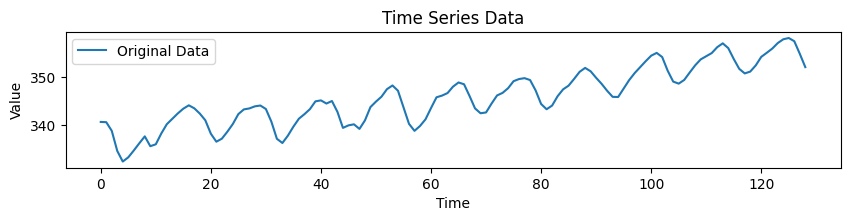

In [11]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(data['value'], label='Original Data')
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()